# Mean Average Precision (MAP) of downstream tasks 

In this notebook, we use all 1030 assays with our model on chromosome 21 and report the MAP. We first transform the data using the arc sin transformation mentioned in the Avocado paper which is given by:

$$ arcsinh(x) = ln(x + \sqrt(1 + x^2)) $$

## Hidden size = 24

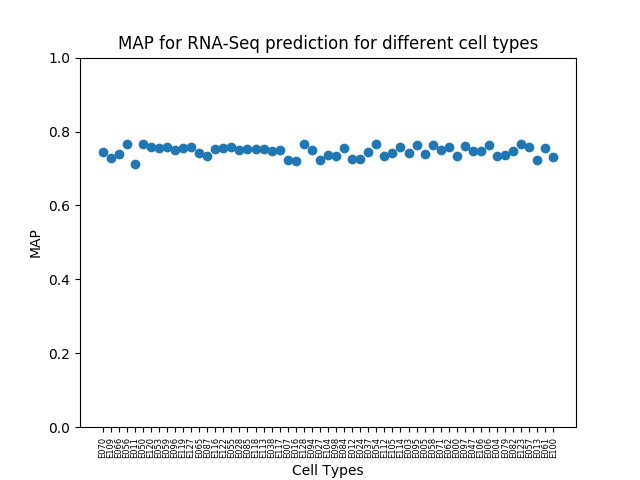

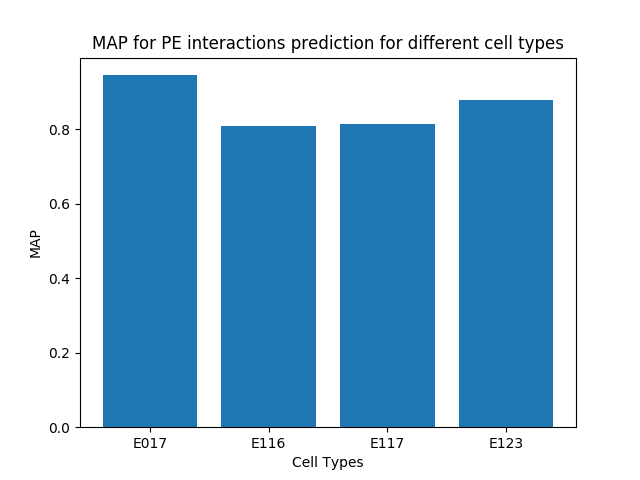

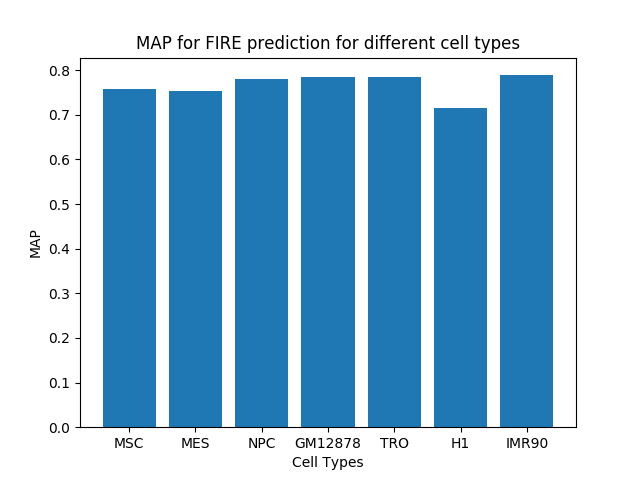

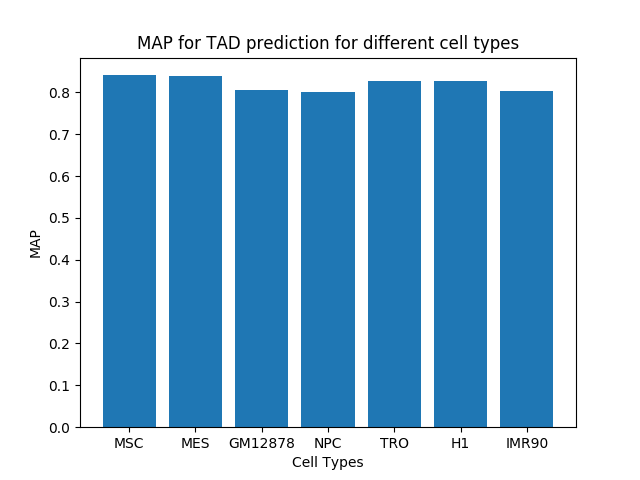

## Hidden size = 110


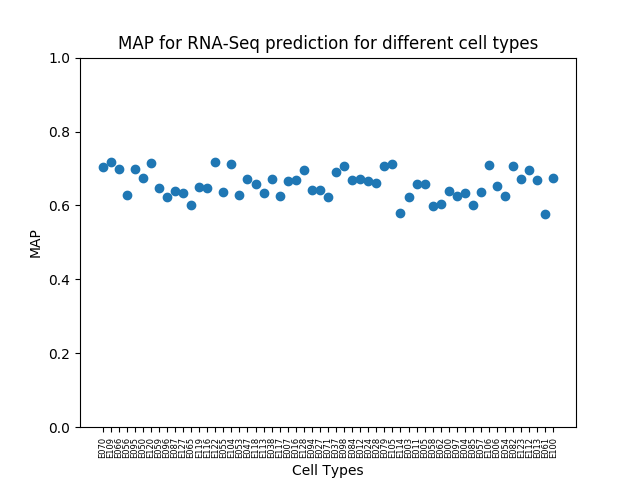

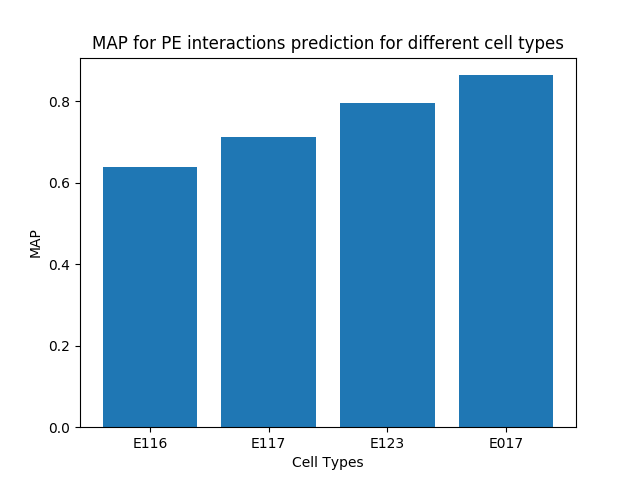

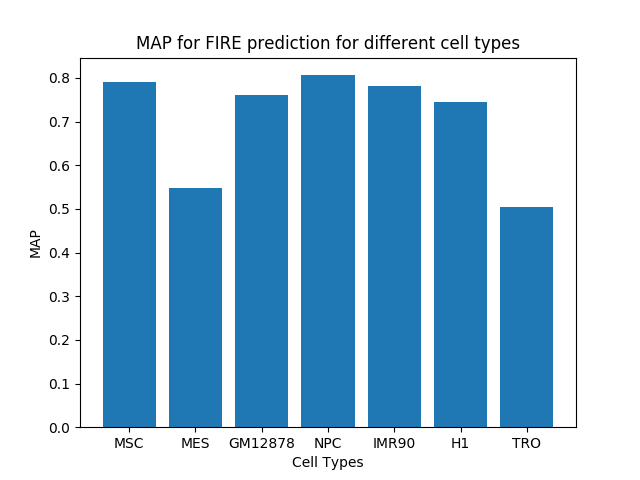

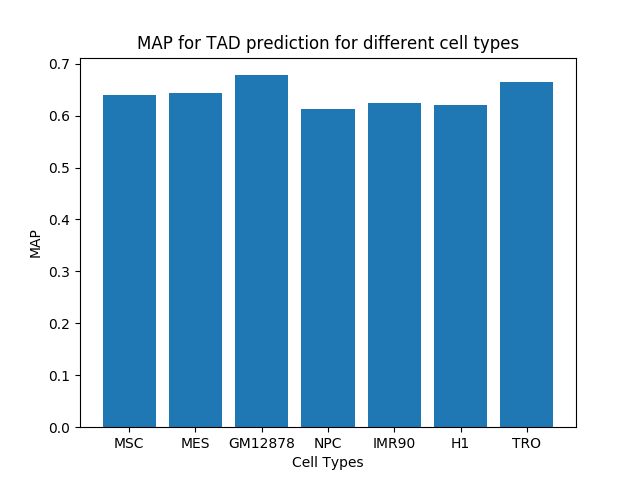

It is noted that hidden size = 24 outperforms hidden size = 110 in all the tasks thereby suggesting that increase in hidden size does not correspond to increase in MAP. It might be the case that MAP increases upto a certain hidden size and then decreases which has to be verified, though I would think teh findings would not be very informative. 

## Avocado 

Avocado uses 110 features in total comprising of 25 at 25 bp resolution, 40 at 250 bp resolution and 45 at 5k bp resolution. Avocado takes a lot of time to run and I'm facing both memory and computational constraints while training the model. However, the pretrained model per chromosome is made available by jacob and this can be used to evaluate downstream tasks. 

I tried running the model trained on chromosome and the xgboost classifier still takes a lot of time for cross-validation run and doing this for multiple cross-validation runs and cell types would still take a considerable amount of time as well as memory. I'm not sure what's the best way to go ahead with this. 

For comparison with our model, the graphs from the avocado paper are given below.  

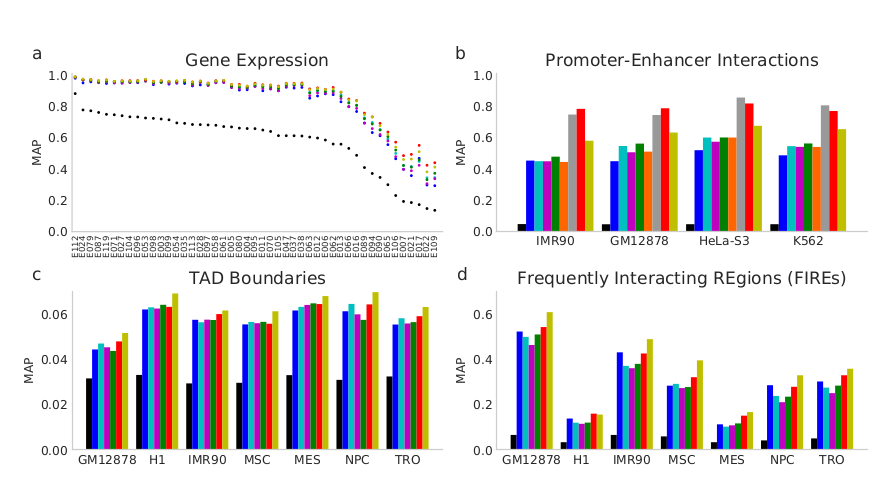

## Observations

1. Our model with 24 hidden nodes (some of them are set to zero, so technically the effective number of non zero features is lesser) outperforms the avocado model in predicting PE interactions, FIREs and TAD boundaries. 
2. The improvement in TAD prediction is quite significant with a ten fold increase in MAP.   
3. With respect to gene expression, our model predicts gene expression consistently across different cell types (MAP of around 0.8), whereas avocado does very well for certain cell types and poorly for others. (The performance of avocado is not verified yet because I'm not able to run Avocado exhaustively)
4. Avocado genomic factors need to be trained on each chromosome separately whereas because our model is an autoencoder, it needs to be trained on only a small subset of the data (say chromosome 21) and can be directly used to get latent factors of all chromosomes. Currently verifying this by testing the chromosome 21 trained model on chromosome 20. 